In [1]:
import pandas as pd
from constants import DATA_PATH, EOS_FILE, SENTINEL_FILE

sentinel = pd.read_csv(DATA_PATH / SENTINEL_FILE)
eos = pd.read_csv(DATA_PATH / EOS_FILE)

In [2]:
sentinel = sentinel[sentinel['SM1 (%)'] != 50]
eos = eos[eos['SM1 (%)'] != 50]

In [3]:
from constants import X_cols_eos, X_cols_sentinel, y_col

X_sentinel = sentinel[X_cols_sentinel].values
X_eos = eos[X_cols_eos].values

y_sentinel = sentinel[y_col].values
y_eos = eos[y_col].values

2025-11-20 05:07:41.829348: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


=== Running RandomForest for EOS-04 ===
Fitting 3 folds for each of 216 candidates, totalling 648 fits
RandomForest Test R2 Score - 26.0235


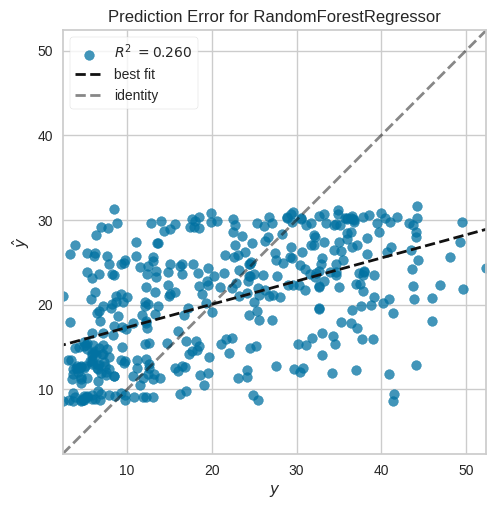

=== Running XGBoost for EOS-04 ===
Fitting 3 folds for each of 108 candidates, totalling 324 fits
XGBoost Test R2 Score - 25.8487


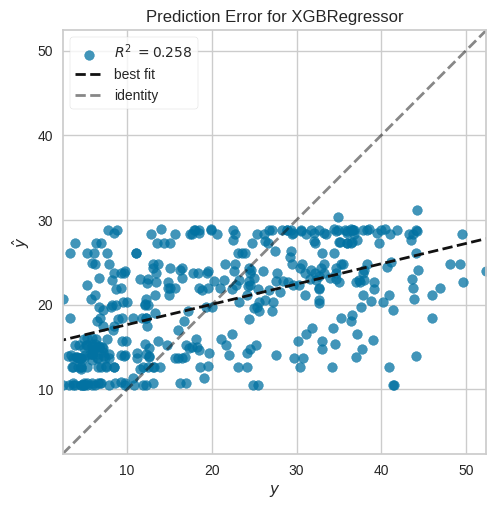

=== Running AdaBoost for EOS-04 ===
Fitting 3 folds for each of 144 candidates, totalling 432 fits
AdaBoost Test R2 Score - 25.9246


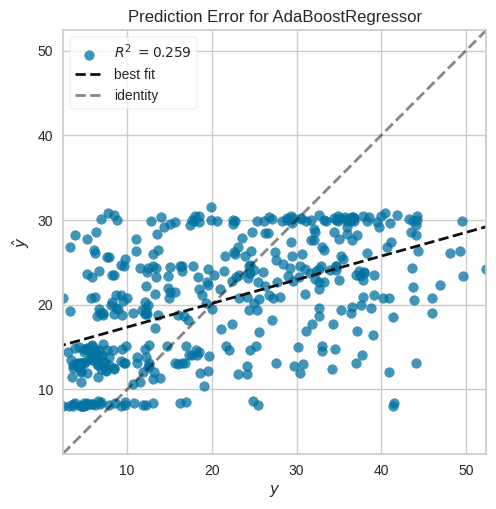

=== Running SVR for EOS-04 ===
Fitting 3 folds for each of 320 candidates, totalling 960 fits
SVR Test R2 Score - 24.4988


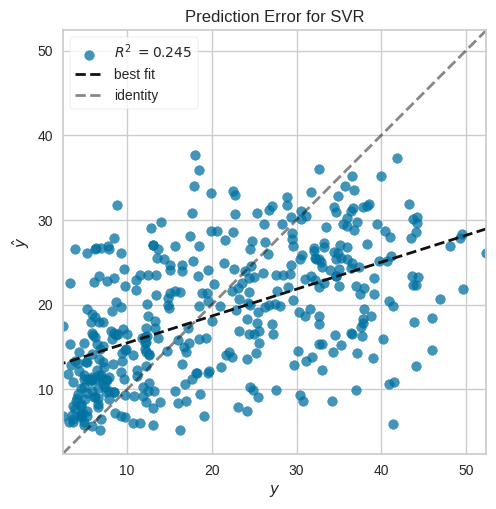

Metrics saved successfully.


{'RandomForest': {'MAE': 8.9548,
  'MSE': 121.6618,
  'RMSE': 11.03,
  'R2': 0.2602,
  'MAPE': 0.7303},
 'XGBoost': {'MAE': 9.0939,
  'MSE': 121.9493,
  'RMSE': 11.0431,
  'R2': 0.2585,
  'MAPE': 0.7605},
 'AdaBoost': {'MAE': 8.936,
  'MSE': 121.8244,
  'RMSE': 11.0374,
  'R2': 0.2592,
  'MAPE': 0.733},
 'SVR': {'MAE': 8.8148,
  'MSE': 124.1693,
  'RMSE': 11.1431,
  'R2': 0.245,
  'MAPE': 0.6359}}

In [4]:
from model_experiments import RegressionExperiment

re = RegressionExperiment(X_eos, y_eos, satellite="EOS-04", train_size=0.8, test_size=0.2, split_type='train-test', type='uncensored')
re.run_experiment()

=== Running RandomForest for Sentinel-1 ===
Fitting 3 folds for each of 216 candidates, totalling 648 fits
RandomForest Test R2 Score - 26.1781


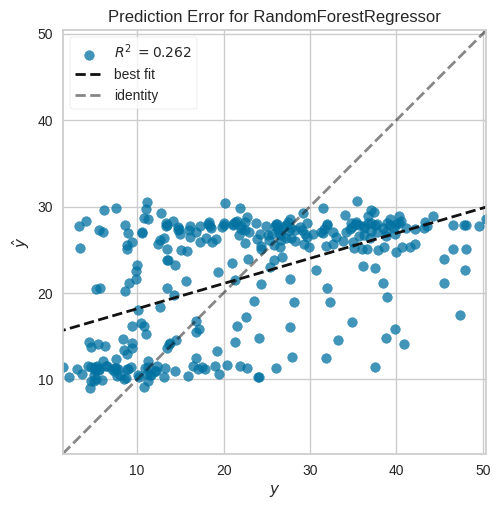

=== Running XGBoost for Sentinel-1 ===
Fitting 3 folds for each of 108 candidates, totalling 324 fits
XGBoost Test R2 Score - 26.6433


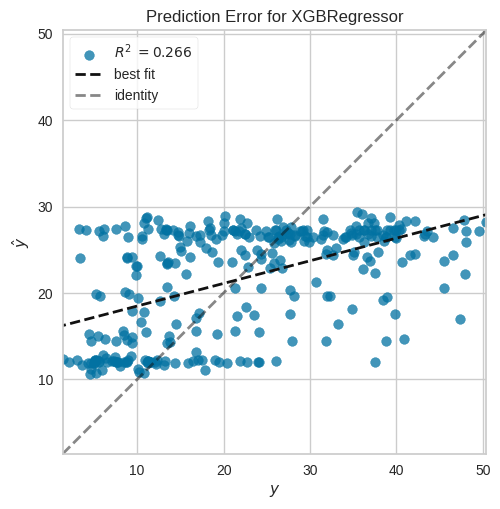

=== Running AdaBoost for Sentinel-1 ===
Fitting 3 folds for each of 144 candidates, totalling 432 fits
AdaBoost Test R2 Score - 25.8026


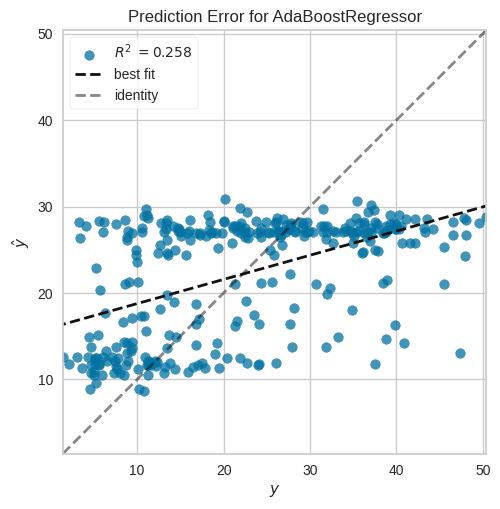

=== Running SVR for Sentinel-1 ===
Fitting 3 folds for each of 320 candidates, totalling 960 fits
SVR Test R2 Score - 25.0631


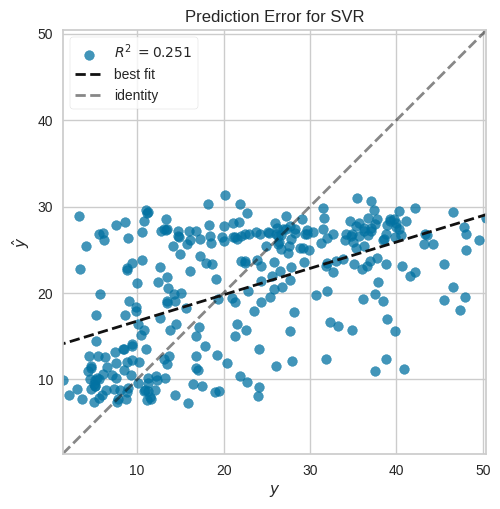

Metrics saved successfully.


{'RandomForest': {'MAE': 8.4926,
  'MSE': 112.6924,
  'RMSE': 10.6157,
  'R2': 0.2618,
  'MAPE': 0.6203},
 'XGBoost': {'MAE': 8.5618,
  'MSE': 111.9821,
  'RMSE': 10.5822,
  'R2': 0.2664,
  'MAPE': 0.6357},
 'AdaBoost': {'MAE': 8.5949,
  'MSE': 113.2655,
  'RMSE': 10.6426,
  'R2': 0.258,
  'MAPE': 0.6495},
 'SVR': {'MAE': 8.4766,
  'MSE': 114.3945,
  'RMSE': 10.6955,
  'R2': 0.2506,
  'MAPE': 0.5731}}

In [5]:
re = RegressionExperiment(X_sentinel, y_sentinel, satellite="Sentinel-1", train_size=0.8, test_size=0.2, split_type='train-test', type='uncensored')
re.run_experiment()